# Demo of the GTM Magic Synthetic Samples

In this script we show how to create synthetic samples

In [1]:
from gtm import *

import os
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from demos.load_analyze_magic_data_helpers import *

/Users/matthiasherp/anaconda3/envs/mctm_pytorch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


got up one directory as new working directory so that loading data works. Should be in the package root.

In [2]:
# only run this once
os.chdir(os.path.dirname(os.getcwd()))
# print(os.getcwd())

In [3]:
num_decorr_layers = 8
group = "h"
loaded_model = torch.load(os.path.join("demos", "models", f"magic_group_{group}_decorr_{num_decorr_layers}_gtm_state_dict.pth"), map_location=torch.device('cpu'))
loaded_model = loaded_model.to('cpu')

#num_decorr_layers = 6
#group = "g"
#loaded_model = torch.load(os.path.join("demos", "models", f"magic_group_{group}_decorr_{num_decorr_layers}_gtm_state_dict.pth"), map_location=torch.device('cpu'))
#loaded_model = loaded_model.to('cpu')

/var/folders/57/_f_fv4s97k300zslnyj86dxc0000gn/T/ipykernel_11424/1675865527.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load(os.path.join("demos

In [4]:
group = "h"

y_train_group_h, y_validate_group_h, y_test_group_h = load_magic_data(group=group,
                                                            train_portion=2/3,
                                                            data_dims=10,
                                                            poly_span_abs=12,
                                                            cross_validation_folds=5,
                                                            validation_fold_index=4,
                                                            split_random_state=25)
                
#group = "g"
#
#y_train_group_g, y_validate_group_g, y_test_group_g = load_magic_data(group=group,
#                                                            train_portion=2/3,
#                                                            data_dims=10,
#                                                            poly_span_abs=12,
#                                                            cross_validation_folds=5,
#                                                            validation_fold_index=4,
#                                                            split_random_state=25)
#                

In [5]:
loaded_model.approximate_transformation_inverse()
synthetic_samples = loaded_model.sample(n_samples=10000)
synthetic_samples = synthetic_samples.detach().numpy()

/Users/matthiasherp/Desktop/phd_github_repositories/gtm/gtm/gtm_splines/bspline_prediction_vectorized.py:526: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3687.)
  t=knots.T,


In [6]:
# first is x axis, second y axis
interesting_pairplots = torch.tensor([[0,6], #v to the right
                                      [0,8], #wall to the left that fade to right
                                      [3,7], #right variance reduction
                                      [4,2], #booomerang
                                      [5,6], #tilted cross
                                      [7,6] #x
                                     ])

for all plotting functions via storage and passing a relativ directory the plots can be stored.

In [7]:
for i in range(interesting_pairplots.size(0)):
    cols = interesting_pairplots[i,:]

    loaded_model.plot_densities(synthetic_samples[:,cols], x_lim=[-15,15],y_lim=[-15,15], storage="demos/synthetic_plots/magic_h_gtm_synthetic_pairplot_"+str(i)+".png",
                                             show_plot=False)

In [8]:
for i in range(interesting_pairplots.size(0)):
    cols = interesting_pairplots[i,:]

    loaded_model.plot_densities(y_train_group_h[:,cols], x_lim=[-15,15],y_lim=[-15,15], storage="demos/synthetic_plots/magic_h_training_data_pairplot_"+str(i)+".png",
                                show_plot=False)

We then load both the training data plots and synthetic samples plots to compare them visually

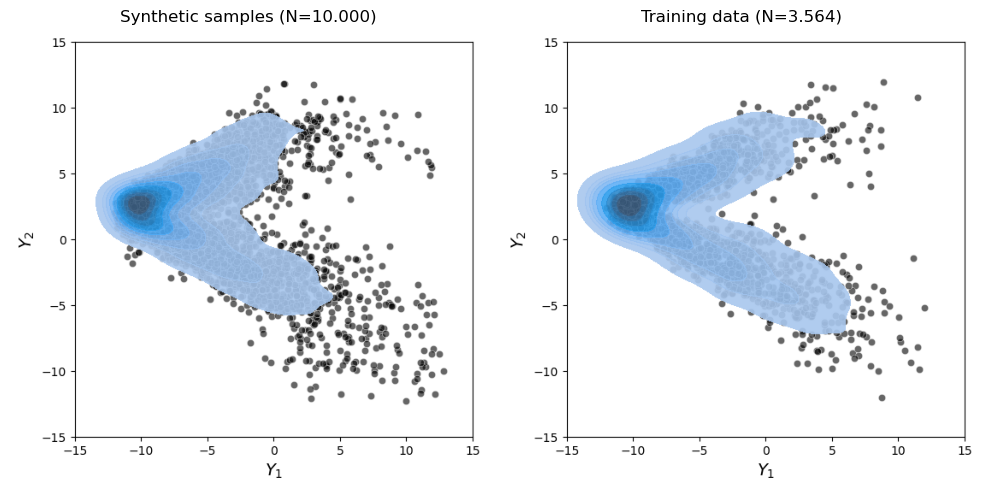

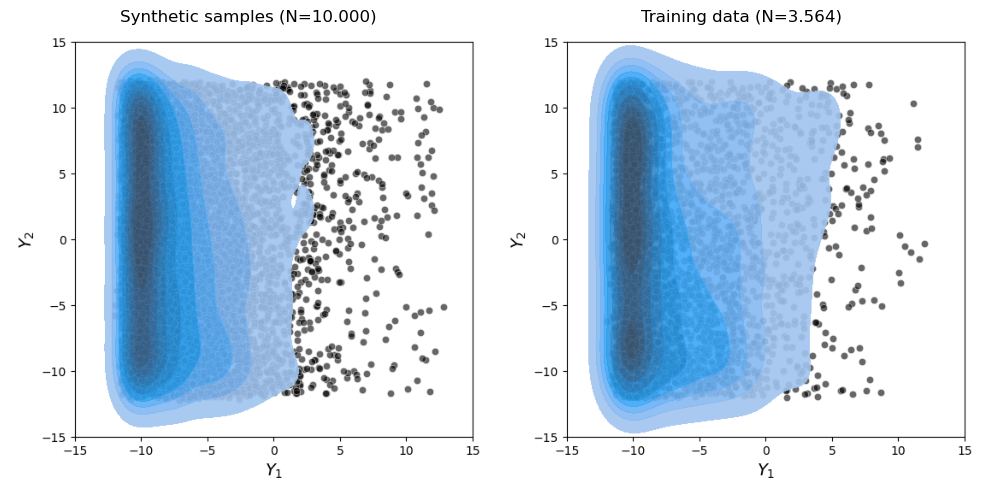

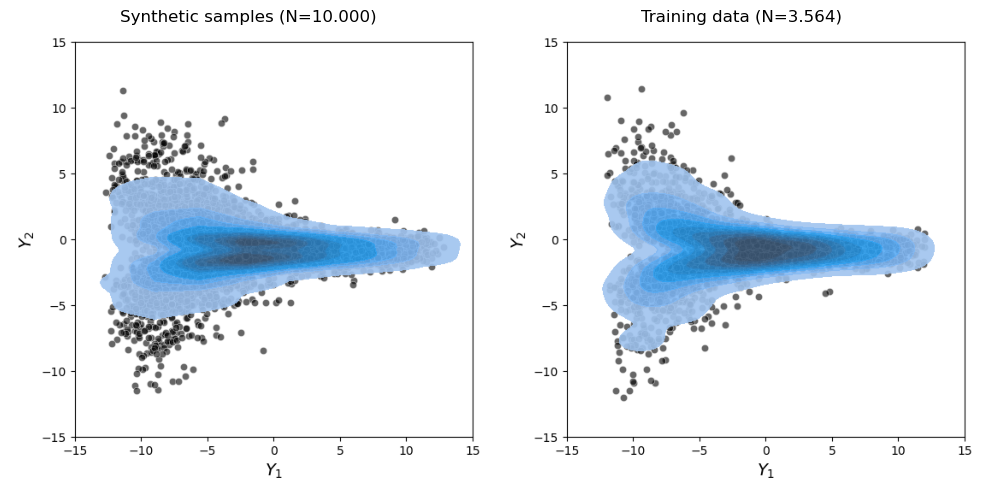

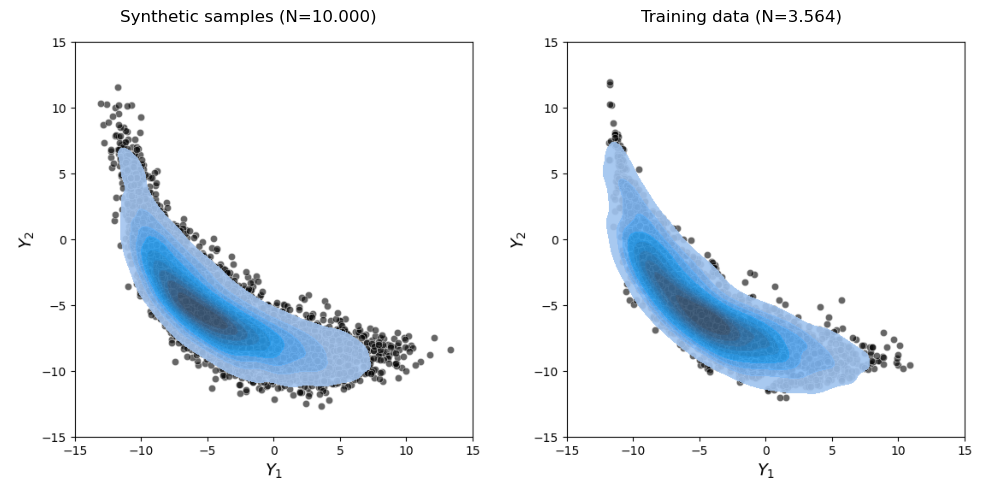

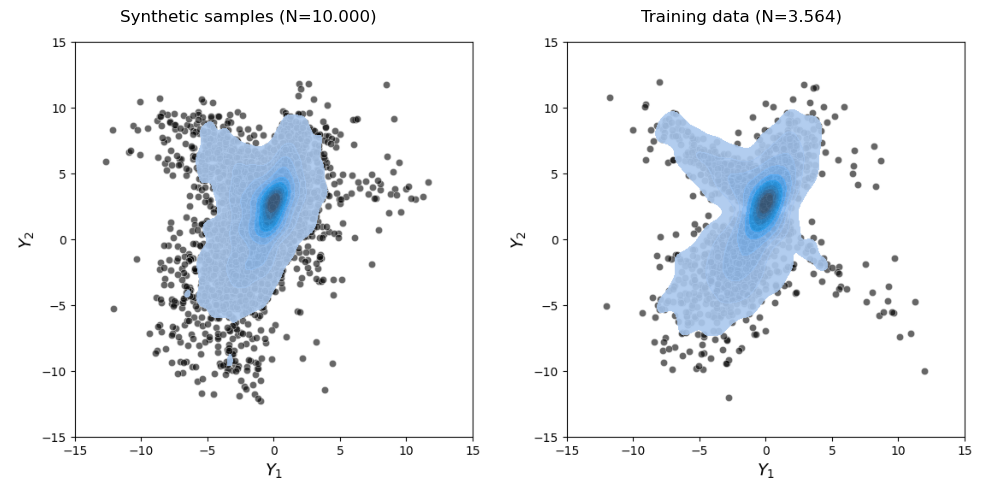

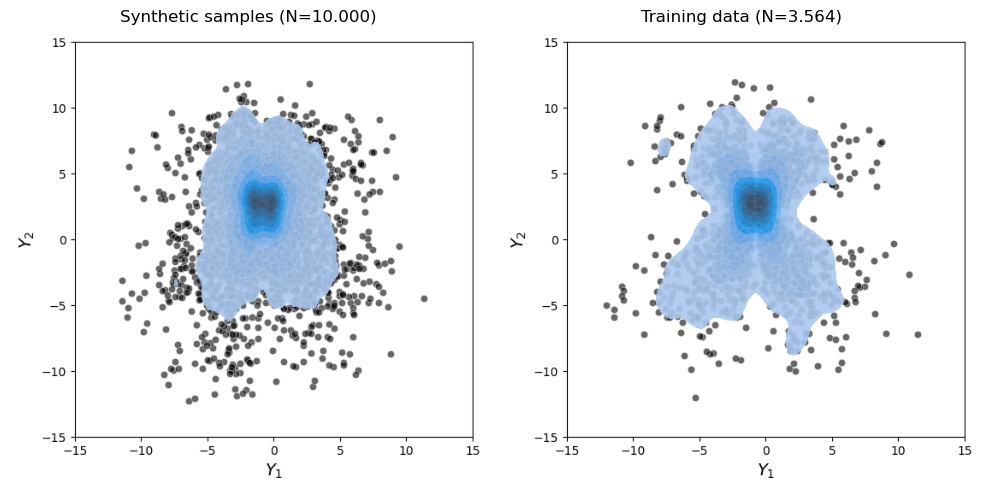

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(interesting_pairplots.size(0)):
    cols = interesting_pairplots[i,:]

    # Load the images
    img1 = mpimg.imread("demos/synthetic_plots/magic_h_gtm_synthetic_pairplot_"+str(i)+".png")
    img2 = mpimg.imread("demos/synthetic_plots/magic_h_training_data_pairplot_"+str(i)+".png")

    # Plot them side by side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

    axs[0].imshow(img1)
    axs[0].axis('off')
    axs[0].set_title('Synthetic samples (N=10.000)')

    axs[1].imshow(img2)
    axs[1].axis('off')
    axs[1].set_title('Training data (N=3.564)')

    plt.tight_layout()
    plt.show()